<a href="https://colab.research.google.com/github/pierreyo/cashier_retail/blob/main/Cashier_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [ ]:
import keras
from keras import models
from keras.models import Model
from keras.models import Sequential
from keras import layers
from keras.layers import Input,Dense,Activation,Conv2D,Flatten,MaxPool2D,Dropout
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import drive
from keras.preprocessing.image import ImageDataGenerator
from keras import metrics
from keras.losses import binary_focal_crossentropy
from keras.optimizers import adam
from keras.regularizers import l2

In [ ]:
drive.mount('/content/drive') # mount drive to get acsess to the data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# detrmine the data and test location
test_loc=('/content/drive/MyDrive/NTI proj/images (1)/test (1)')
train_loc=('/content/drive/MyDrive/NTI proj/images (1)/train (1)')

## Data Preprocessing

In [ ]:
# Scaling our data
trdata= ImageDataGenerator(rescale=1./255)
traindata=trdata.flow_from_directory(directory=train_loc, target_size=(224,224))

Found 237 images belonging to 6 classes.


In [ ]:
tsdata= ImageDataGenerator(rescale=1./255)
testdata=tsdata.flow_from_directory(directory=test_loc, target_size=(224,224))

Found 60 images belonging to 6 classes.


In [ ]:
traindata.class_indices

{'aqua': 0,
 'chitato': 1,
 'indomie': 2,
 'pepsodent': 3,
 'shampoo': 4,
 'tissue': 5}

## Model 1:


In [ ]:
from os import name
input_shape=(224,224,3)
#input_layer
Img_input=Input(shape=input_shape,name="this-the_input_layer")

#conv layers

x=Conv2D(32,(3,3),padding='same',activation='relu',name='layer_1')(Img_input)
x=Conv2D(64,(3,3),padding='same',activation='relu',name='layer_2')(x)
x=MaxPool2D((2,2),strides=(2,2),name='maxplool1')(x)
# x=Dropout(0.25)(x)

x=Conv2D(32,(3,3),padding='same',activation='relu',name='layer_3')(x)
x=MaxPool2D((2,2),strides=(2,2),name='maxplool2')(x)

x=Conv2D(32,(3,3),padding='same',activation='relu',name='layer_4')(x)
x=MaxPool2D((2,2),strides=(2,2),name='maxplool3')(x)

x=Flatten(name='flat')(x)
x=Dense(64,name='classifer')(x)
# x=Dropout(0.25)(x)
x=Dense(6,activation='softmax',name='classification')(x)


In [ ]:
#generate model
model_1=Model(inputs= Img_input,outputs=x , name='Cashier_classification')

In [ ]:
model_1.summary()

Model: "Cashier_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 this-the_input_layer (Input  [(None, 224, 224, 3)]    0         
 Layer)                                                          
                                                                 
 layer_1 (Conv2D)            (None, 224, 224, 32)      896       
                                                                 
 layer_2 (Conv2D)            (None, 224, 224, 64)      18496     
                                                                 
 maxplool1 (MaxPooling2D)    (None, 112, 112, 64)      0         
                                                                 
 layer_3 (Conv2D)            (None, 112, 112, 32)      18464     
                                                                 
 maxplool2 (MaxPooling2D)    (None, 56, 56, 32)        0         
                                            

In [ ]:
model_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
batch_size=32
results= model_1.fit(traindata,steps_per_epoch= traindata.samples/batch_size,validation_data=(testdata), validation_steps= testdata.samples/batch_size, epochs=40)

Epoch 1/40
7/7 [==============================] - 98s 11s/step - loss: 0.5250 - accuracy: 0.2447 - val_loss: 0.4296 - val_accuracy: 0.3000
Epoch 2/40
7/7 [==============================] - 1s 179ms/step - loss: 0.3960 - accuracy: 0.3629 - val_loss: 0.3270 - val_accuracy: 0.4833
Epoch 3/40
7/7 [==============================] - 1s 174ms/step - loss: 0.3060 - accuracy: 0.5654 - val_loss: 0.2912 - val_accuracy: 0.5667
Epoch 4/40
7/7 [==============================] - 1s 173ms/step - loss: 0.2536 - accuracy: 0.6456 - val_loss: 0.2536 - val_accuracy: 0.6000
Epoch 5/40
7/7 [==============================] - 2s 233ms/step - loss: 0.2208 - accuracy: 0.7553 - val_loss: 0.2462 - val_accuracy: 0.6667
Epoch 6/40
7/7 [==============================] - 1s 189ms/step - loss: 0.1892 - accuracy: 0.8017 - val_loss: 0.2679 - val_accuracy: 0.6333
Epoch 7/40
7/7 [==============================] - 1s 168ms/step - loss: 0.1640 - accuracy: 0.8270 - val_loss: 0.2393 - val_accuracy: 0.6833
Epoch 8/40
7/7 [=====

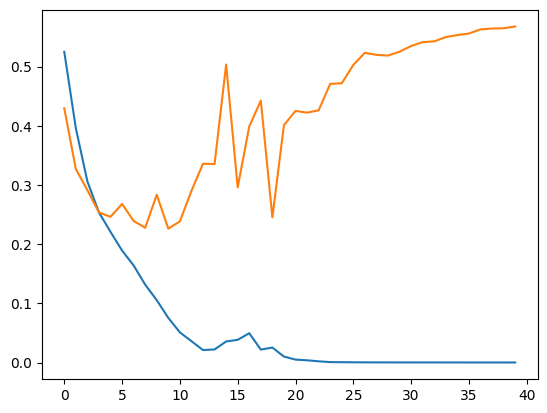

In [ ]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.show()

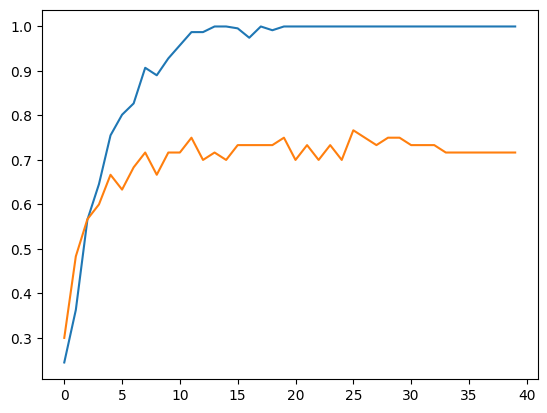

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.show()

In [ ]:
score= model_1.evaluate(testdata)

print('test loss',score[0])
print('test accuracy',score[1])

2/2 [==============================] - 0s 215ms/step - loss: 0.5678 - accuracy: 0.7167
test loss 0.5678061246871948
test accuracy 0.7166666388511658


Over fitting model as the train accuarcy is 1 and test acc is 0.7

## model 2
we did ogmantion to increase data
and add dropout technique to reduce over fitting

In [ ]:
trdata_2= ImageDataGenerator(rescale=1./255,shear_range=0.2, zoom_range=0.2,horizontal_flip=True,vertical_flip=True, rotation_range=10)
traindata_2 = trdata_2.flow_from_directory(directory=train_loc, target_size=(224,224), class_mode='categorical')

Found 237 images belonging to 6 classes.


In [ ]:
traindata.class_indices

{'aqua': 0,
 'chitato': 1,
 'indomie': 2,
 'pepsodent': 3,
 'shampoo': 4,
 'tissue': 5}

In [ ]:
from os import name
input_shape=(224,224,3)
#input_layer
Img_input=Input(shape=input_shape,name="this-the_input_layer")

#conv layers

x=Conv2D(32,(3,3),padding='same',activation='relu',name='layer_1')(Img_input)
x=Conv2D(64,(3,3),padding='same',activation='relu',name='layer_2')(x)
x=MaxPool2D((2,2),strides=(2,2),name='maxplool1')(x)
# x=Dropout(0.25)(x)

x=Conv2D(32,(3,3),padding='same',activation='relu',name='layer_3')(x)
x=MaxPool2D((2,2),strides=(2,2),name='maxplool2')(x)

x=Conv2D(32,(3,3),padding='same',activation='relu',name='layer_4')(x)
x=MaxPool2D((2,2),strides=(2,2),name='maxplool3')(x)

x=Flatten(name='flat')(x)
x=Dense(64,name='classifer')(x)
x=Dropout(0.25)(x)
x=Dense(6,activation='softmax',name='classification')(x)

In [ ]:
#generate model
model_2 = Model(inputs= Img_input,outputs=x , name='Cashier_classification')

In [ ]:
model_2.summary()

Model: "Cashier_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 this-the_input_layer (Input  [(None, 224, 224, 3)]    0         
 Layer)                                                          
                                                                 
 layer_1 (Conv2D)            (None, 224, 224, 32)      896       
                                                                 
 layer_2 (Conv2D)            (None, 224, 224, 64)      18496     
                                                                 
 maxplool1 (MaxPooling2D)    (None, 112, 112, 64)      0         
                                                                 
 layer_3 (Conv2D)            (None, 112, 112, 32)      18464     
                                                                 
 maxplool2 (MaxPooling2D)    (None, 56, 56, 32)        0         
                                            

In [ ]:
model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
batch_size=32
results2 = model_2.fit(traindata_2,steps_per_epoch= traindata_2.samples/batch_size,validation_data=(testdata), validation_steps= testdata.samples/batch_size, epochs=40)

Epoch 1/40
7/7 [==============================] - 4s 552ms/step - loss: 0.3590 - accuracy: 0.4641 - val_loss: 0.3367 - val_accuracy: 0.5167
Epoch 2/40
7/7 [==============================] - 5s 600ms/step - loss: 0.3444 - accuracy: 0.5063 - val_loss: 0.3278 - val_accuracy: 0.5333
Epoch 3/40
7/7 [==============================] - 4s 504ms/step - loss: 0.3215 - accuracy: 0.5190 - val_loss: 0.2821 - val_accuracy: 0.5833
Epoch 4/40
7/7 [==============================] - 4s 510ms/step - loss: 0.2996 - accuracy: 0.5823 - val_loss: 0.2474 - val_accuracy: 0.6333
Epoch 5/40
7/7 [==============================] - 4s 495ms/step - loss: 0.2766 - accuracy: 0.6160 - val_loss: 0.2906 - val_accuracy: 0.6333
Epoch 6/40
7/7 [==============================] - 4s 512ms/step - loss: 0.2653 - accuracy: 0.6624 - val_loss: 0.2447 - val_accuracy: 0.6667
Epoch 7/40
7/7 [==============================] - 5s 679ms/step - loss: 0.2458 - accuracy: 0.6835 - val_loss: 0.2325 - val_accuracy: 0.7167
Epoch 8/40
7/7 [====

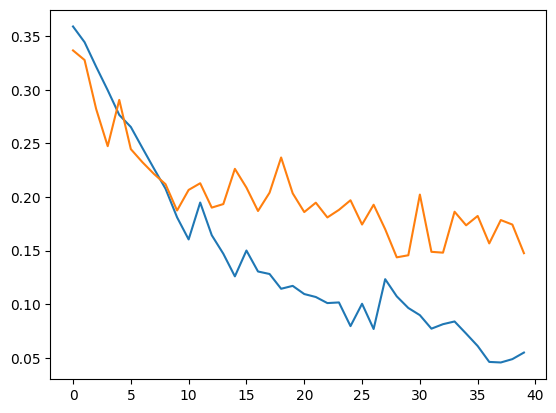

In [ ]:
plt.plot(results2.history['loss'])
plt.plot(results2.history['val_loss'])
plt.show()

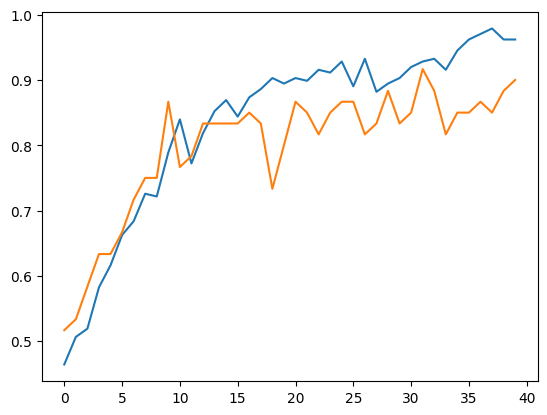

In [ ]:
plt.plot(results2.history['accuracy'])
plt.plot(results2.history['val_accuracy'])
plt.show()

In [ ]:
score= model_2.evaluate(testdata)

print('test loss',score[0])
print('test accuracy',score[1])

2/2 [==============================] - 0s 159ms/step - loss: 0.1477 - accuracy: 0.9000
test loss 0.14765383303165436
test accuracy 0.8999999761581421


Train acc is 96 and test acc is 90

the accurecy has increased and the over fitting decreased

## model 3

Increasing two regulaization layers and dropout layer to solve high variance (over fitting)


In [ ]:
from os import name
input_shape=(224,224,3)
#input_layer
Img_input=Input(shape=input_shape,name="this-the_input_layer")

#conv layers

x=Conv2D(32,(3,3),padding='same',activation='relu',name='layer_1')(Img_input)
x=Conv2D(64,(3,3),padding='same',activation='relu',name='layer_2')(x)
x=MaxPool2D((2,2),strides=(2,2),name='maxplool1')(x)
x=Dropout(0.25)(x)

x=Conv2D(32,(3,3),padding='same',activation='relu',name='layer_3')(x)
x=MaxPool2D((2,2),strides=(2,2),name='maxplool2')(x)

x=Conv2D(32,(3,3),padding='same',activation='relu',name='layer_4')(x)
x=MaxPool2D((2,2),strides=(2,2),name='maxplool3')(x)

x=Flatten(name='flat')(x)

x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.25)(x)
x=Dense(6,activation='softmax',name='classification')(x)

In [ ]:
model_3 = Model(inputs= Img_input,outputs=x , name='Cashier_classification')

In [ ]:
model_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_3.summary()

Model: "Cashier_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 this-the_input_layer (Input  [(None, 224, 224, 3)]    0         
 Layer)                                                          
                                                                 
 layer_1 (Conv2D)            (None, 224, 224, 32)      896       
                                                                 
 layer_2 (Conv2D)            (None, 224, 224, 64)      18496     
                                                                 
 maxplool1 (MaxPooling2D)    (None, 112, 112, 64)      0         
                                                                 
 dropout_2 (Dropout)         (None, 112, 112, 64)      0         
                                                                 
 layer_3 (Conv2D)            (None, 112, 112, 32)      18464     
                                            

In [ ]:
batch_size=32
results3 = model_3.fit(traindata_2,steps_per_epoch= traindata_2.samples/batch_size,validation_data=(testdata), validation_steps= testdata.samples/batch_size, epochs=40)

Epoch 1/40
7/7 [==============================] - 8s 696ms/step - loss: 0.8161 - accuracy: 0.2194 - val_loss: 0.6904 - val_accuracy: 0.3167
Epoch 2/40
7/7 [==============================] - 4s 526ms/step - loss: 0.6436 - accuracy: 0.2658 - val_loss: 0.6320 - val_accuracy: 0.3333
Epoch 3/40
7/7 [==============================] - 4s 521ms/step - loss: 0.6024 - accuracy: 0.2700 - val_loss: 0.6101 - val_accuracy: 0.4167
Epoch 4/40
7/7 [==============================] - 5s 703ms/step - loss: 0.5668 - accuracy: 0.3460 - val_loss: 0.5368 - val_accuracy: 0.4000
Epoch 5/40
7/7 [==============================] - 4s 578ms/step - loss: 0.5177 - accuracy: 0.3882 - val_loss: 0.4784 - val_accuracy: 0.5500
Epoch 6/40
7/7 [==============================] - 4s 530ms/step - loss: 0.4831 - accuracy: 0.4557 - val_loss: 0.4455 - val_accuracy: 0.4500
Epoch 7/40
7/7 [==============================] - 5s 728ms/step - loss: 0.4561 - accuracy: 0.4684 - val_loss: 0.4194 - val_accuracy: 0.5500
Epoch 8/40
7/7 [====

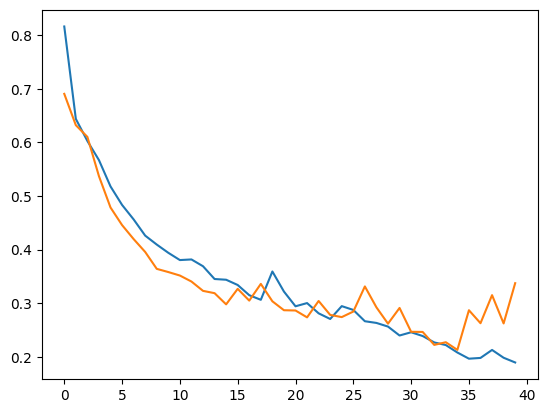

In [ ]:
plt.plot(results3.history['loss'])
plt.plot(results3.history['val_loss'])
plt.show()

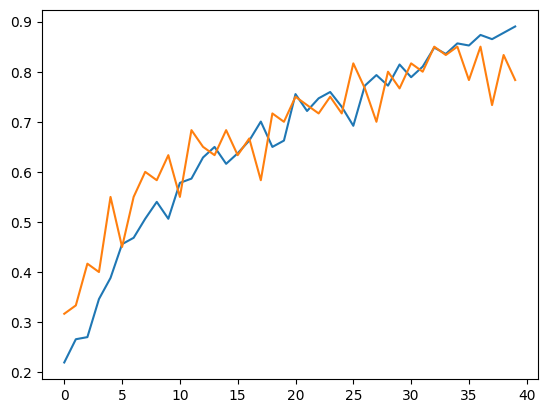

In [ ]:
plt.plot(results3.history['accuracy'])
plt.plot(results3.history['val_accuracy'])
plt.show()

In [ ]:
score= model_3.evaluate(testdata)

print('test loss',score[0])
print('test accuracy',score[1])

2/2 [==============================] - 0s 107ms/step - loss: 0.3372 - accuracy: 0.7833
test loss 0.3372134864330292
test accuracy 0.7833333611488342


train acc is 0.89 and test acc is 0.78
Notes: over fitting increased and the accurecy decreased

## Model 4
we removed the two regulzarion layers and one drop put layer change the drop out to 20 and increase the data by ogmentation techniuqe

In [ ]:
trdata_2= ImageDataGenerator(featurewise_center=True,rescale=1./255,shear_range=0.2, zoom_range=0.2,horizontal_flip=True,vertical_flip=True, rotation_range=45,width_shift_range=0.1,height_shift_range=0.1)
traindata_2 = trdata_2.flow_from_directory(directory=train_loc, target_size=(224,224), class_mode='categorical')

Found 237 images belonging to 6 classes.


In [ ]:
from os import name
input_shape=(224,224,3)
#input_layer
Img_input=Input(shape=input_shape,name="this-the_input_layer")

#conv layers

x=Conv2D(32,(3,3),padding='same',activation='relu',name='layer_1')(Img_input)
x=Conv2D(64,(3,3),padding='same',activation='relu',name='layer_2')(x)
x=Conv2D(128,(3,3),padding='same',activation='relu',name='layer_4')(x)

x=MaxPool2D((2,2),strides=(2,2),name='maxplool1')(x)

x=Conv2D(32,(3,3),padding='same',activation='relu',name='layer_5')(x)
x=MaxPool2D((2,2),strides=(2,2),name='maxplool2')(x)

# x=Dropout(0.20)(x)


x=Conv2D(32,(3,3),padding='same',activation='relu',name='layer_6')(x)
x=MaxPool2D((2,2),strides=(2,2),name='maxplool3')(x)

x=Flatten(name='flat')(x)

# x = Dense(128, activation='relu',name='layer_7', kernel_regularizer=l2(0.001))(x)
# x = Dense(64, activation='relu',name='layer_8', kernel_regularizer=l2(0.001))(x)

x = Dense(64,name='classifer')(x)

x = Dropout(0.20)(x)
x=Dense(6,activation='softmax',name='classification')(x)

In [ ]:
model_4 = Model(inputs= Img_input,outputs=x , name='Cashier_classification')

In [ ]:
model_4.summary()

Model: "Cashier_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 this-the_input_layer (Input  [(None, 224, 224, 3)]    0         
 Layer)                                                          
                                                                 
 layer_1 (Conv2D)            (None, 224, 224, 32)      896       
                                                                 
 layer_2 (Conv2D)            (None, 224, 224, 64)      18496     
                                                                 
 layer_4 (Conv2D)            (None, 224, 224, 128)     73856     
                                                                 
 maxplool1 (MaxPooling2D)    (None, 112, 112, 128)     0         
                                                                 
 layer_5 (Conv2D)            (None, 112, 112, 32)      36896     
                                            

In [ ]:
model_4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
batch_size=32
results3 = model_4.fit(traindata_2,steps_per_epoch= traindata_2.samples/batch_size,validation_data=(testdata), validation_steps= testdata.samples/batch_size, epochs=40)

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/40
7/7 [==============================] - 8s 546ms/step - loss: 0.5335 - accuracy: 0.1814 - val_loss: 0.4432 - val_accuracy: 0.2833
Epoch 2/40
7/7 [==============================] - 4s 563ms/step - loss: 0.4442 - accuracy: 0.2658 - val_loss: 0.4047 - val_accuracy: 0.4000
Epoch 3/40
7/7 [==============================] - 5s 721ms/step - loss: 0.4004 - accuracy: 0.3924 - val_loss: 0.3502 - val_accuracy: 0.4667
Epoch 4/40
7/7 [==============================] - 4s 556ms/step - loss: 0.3783 - accuracy: 0.4304 - val_loss: 0.3491 - val_accuracy: 0.5167
Epoch 5/40
7/7 [==============================] - 5s 649ms/step - loss: 0.3703 - accuracy: 0.4346 - val_loss: 0.3278 - val_accuracy: 0.5000
Epoch 6/40
7/7 [==============================] - 5s 611ms/step - loss: 0.3516 - accuracy: 0.4937 - val_loss: 0.3049 - val_accuracy: 0.5500
Epoch 7/40
7/7 [==============================] - 4s 648ms/step - loss: 0.3275 - accuracy: 0.5148 - val_loss: 0.2895 - val_accuracy: 0.6000
Epoch 8/40
7/7 [====

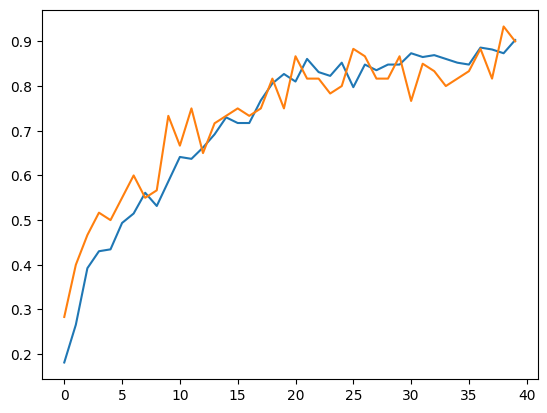

In [ ]:
plt.plot(results3.history['accuracy'])
plt.plot(results3.history['val_accuracy'])
plt.show()

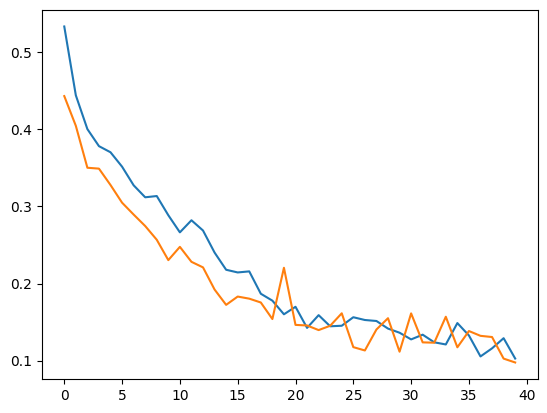

In [ ]:
plt.plot(results3.history['loss'])
plt.plot(results3.history['val_loss'])
plt.show()

train accurecy is 90 and test accurecy is 90 this is the best model fit and best test accurecy

## Model 4 Edited
we increase the number of epochs to 60

In [ ]:
batch_size=32
results3 = model_4.fit(traindata_2,steps_per_epoch= traindata_2.samples/batch_size,validation_data=(testdata), validation_steps= testdata.samples/batch_size, epochs=20)

Epoch 1/20
7/7 [==============================] - 5s 712ms/step - loss: 0.0951 - accuracy: 0.9030 - val_loss: 0.1026 - val_accuracy: 0.9167
Epoch 2/20
7/7 [==============================] - 5s 589ms/step - loss: 0.1063 - accuracy: 0.9156 - val_loss: 0.0707 - val_accuracy: 0.9167
Epoch 3/20
7/7 [==============================] - 5s 687ms/step - loss: 0.0894 - accuracy: 0.9156 - val_loss: 0.0789 - val_accuracy: 0.9167
Epoch 4/20
7/7 [==============================] - 4s 552ms/step - loss: 0.0764 - accuracy: 0.9494 - val_loss: 0.1093 - val_accuracy: 0.9000
Epoch 5/20
7/7 [==============================] - 6s 751ms/step - loss: 0.0986 - accuracy: 0.8987 - val_loss: 0.1096 - val_accuracy: 0.9000
Epoch 6/20
7/7 [==============================] - 5s 585ms/step - loss: 0.1424 - accuracy: 0.8312 - val_loss: 0.1437 - val_accuracy: 0.8667
Epoch 7/20
7/7 [==============================] - 5s 574ms/step - loss: 0.1121 - accuracy: 0.8734 - val_loss: 0.1245 - val_accuracy: 0.8167
Epoch 8/20
7/7 [====

train accurecy is 93 and the test accurecy is 90

In [ ]:

predictions = model_4.predict_generator(testdata)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

<ipython-input-150-b053332d0c1f>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model_4.predict_generator(testdata)


In [ ]:
true_classes = testdata.classes
class_labels = list(testdata.class_indices.keys())

In [ ]:
from sklearn.metrics import classification_report ,confusion_matrix
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


              precision    recall  f1-score   support

        aqua       0.20      0.20      0.20        10
     chitato       0.09      0.10      0.10        10
     indomie       0.30      0.27      0.29        11
   pepsodent       0.00      0.00      0.00        10
     shampoo       0.09      0.10      0.10        10
      tissue       0.11      0.11      0.11         9

    accuracy                           0.13        60
   macro avg       0.13      0.13      0.13        60
weighted avg       0.14      0.13      0.13        60

